0
Early stopping at epoch 238


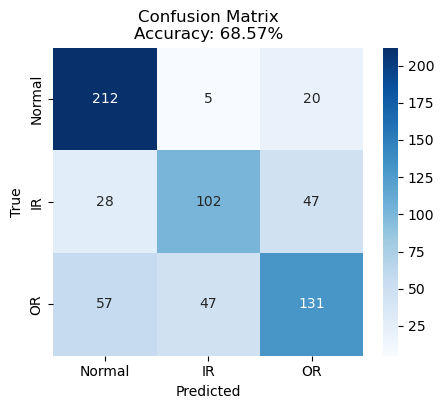

 - Model accuracy: 68.57%


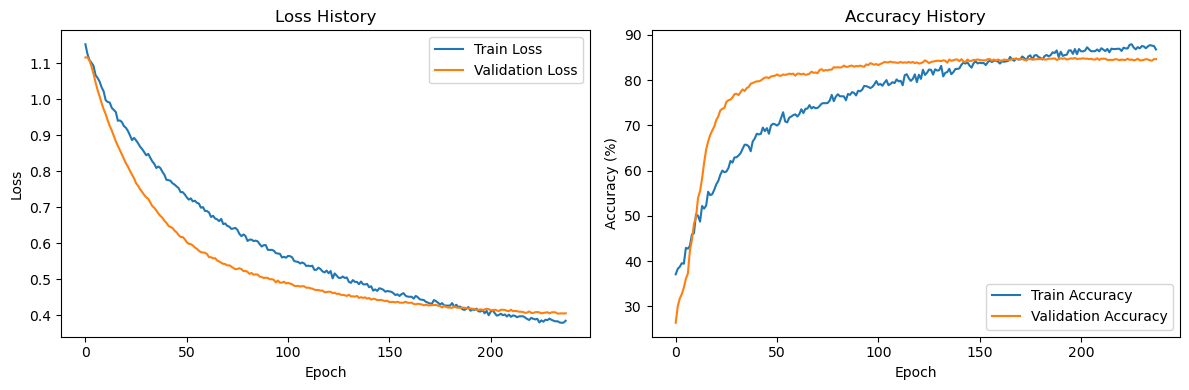

0
Early stopping at epoch 357


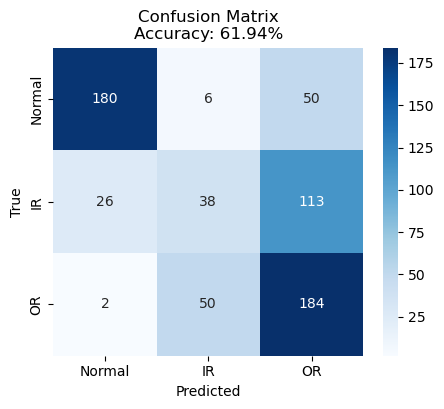

 - Model accuracy: 61.94%


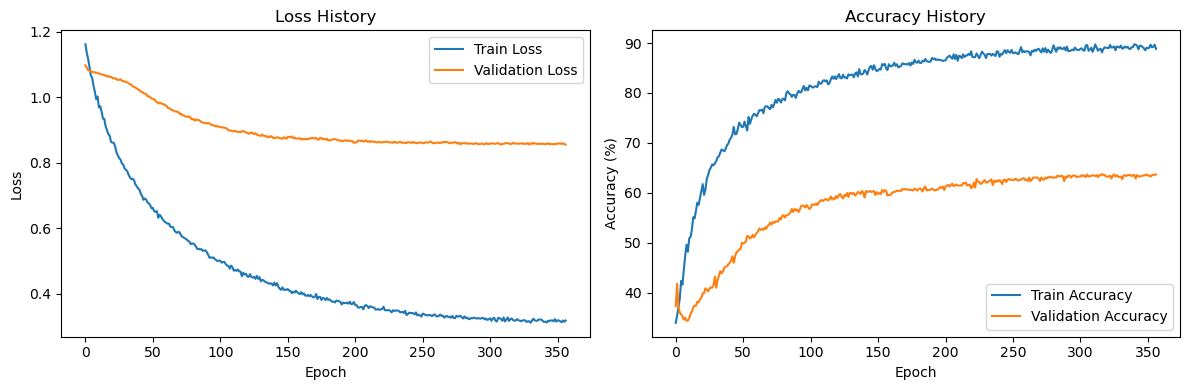

0
Early stopping at epoch 332


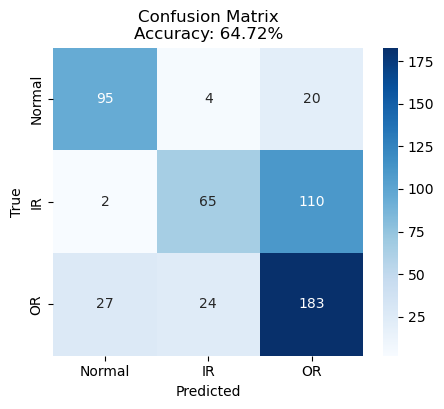

 - Model accuracy: 64.72%


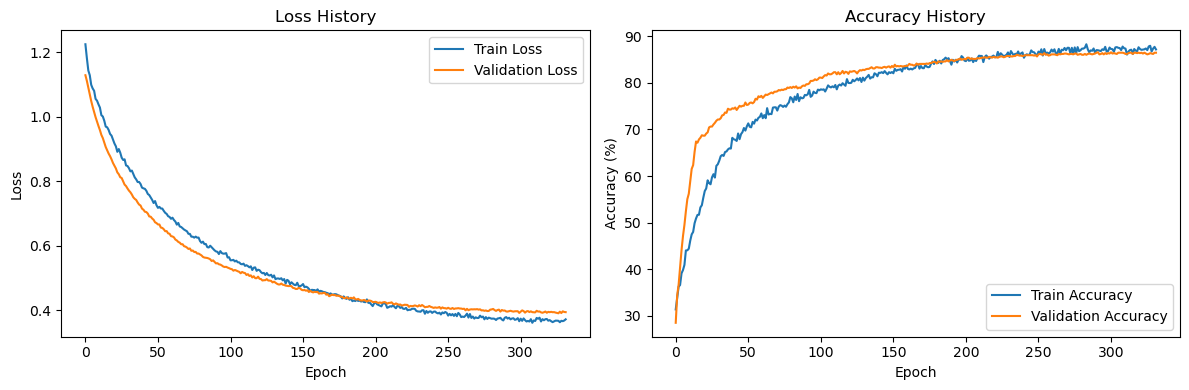

0
Early stopping at epoch 360


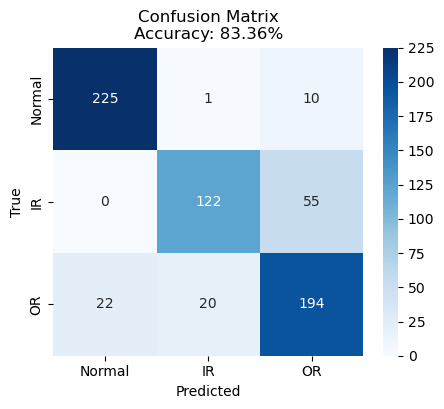

 - Model accuracy: 83.36%


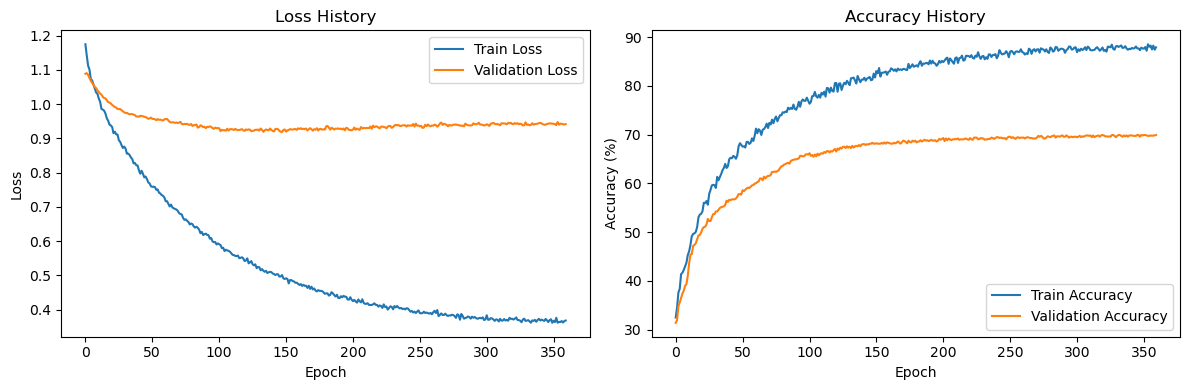

0
Early stopping at epoch 316


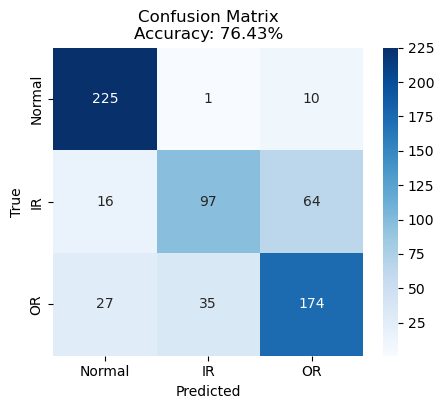

 - Model accuracy: 76.43%


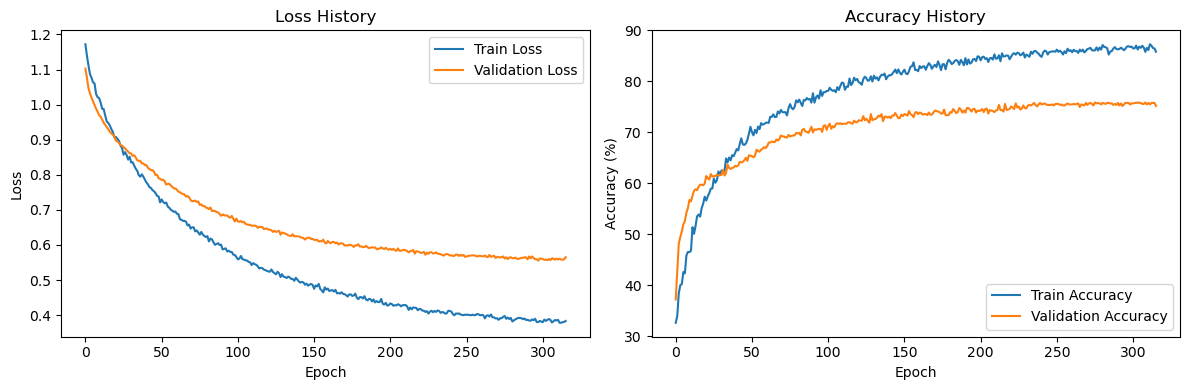

0
Early stopping at epoch 357


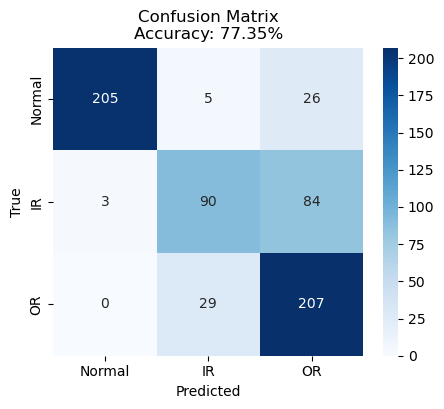

 - Model accuracy: 77.35%


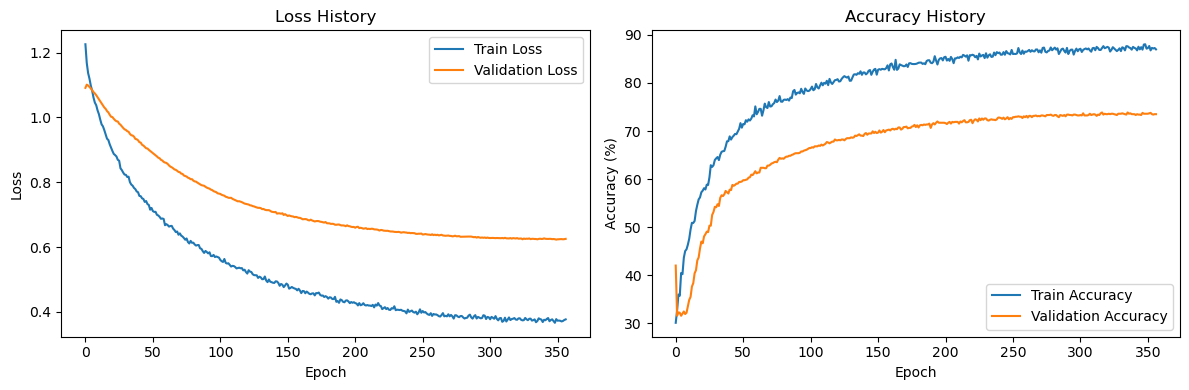

0
Early stopping at epoch 337


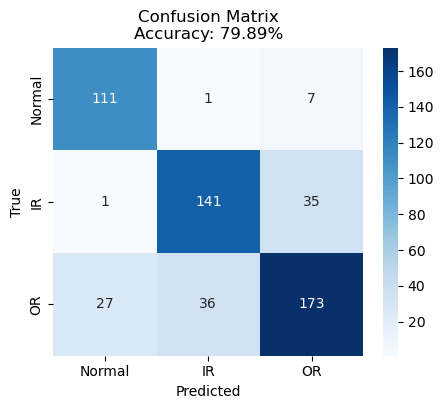

 - Model accuracy: 79.89%


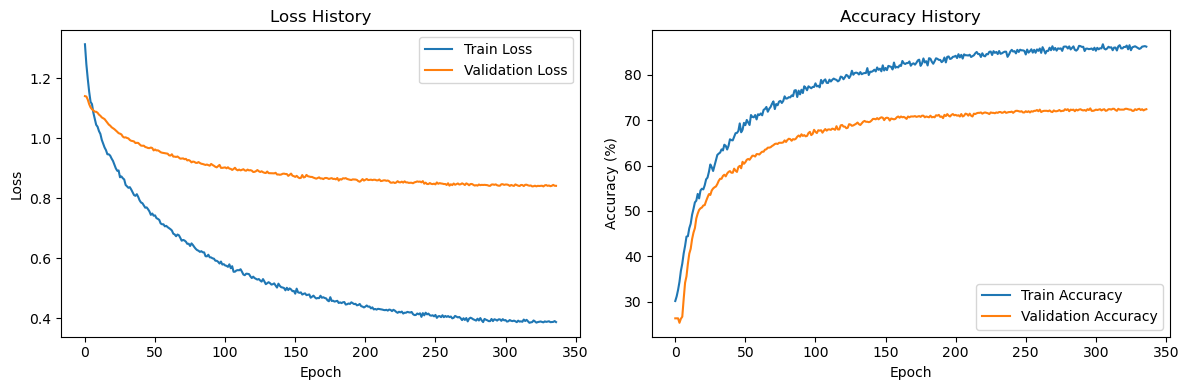

0
Early stopping at epoch 307


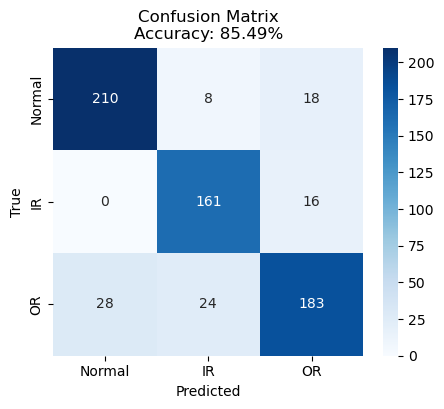

 - Model accuracy: 85.49%


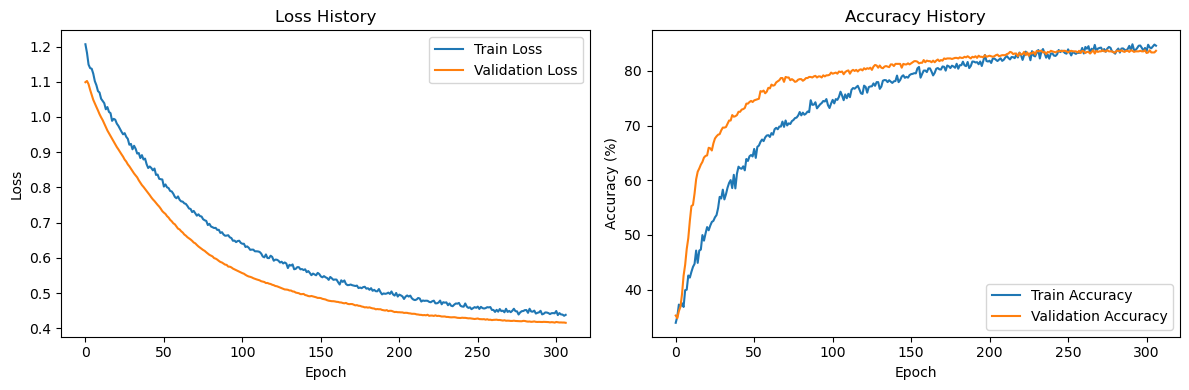

0
Early stopping at epoch 266


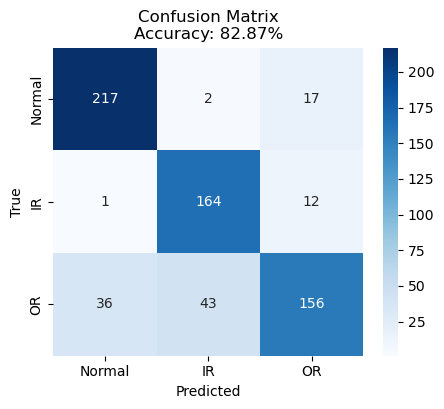

 - Model accuracy: 82.87%


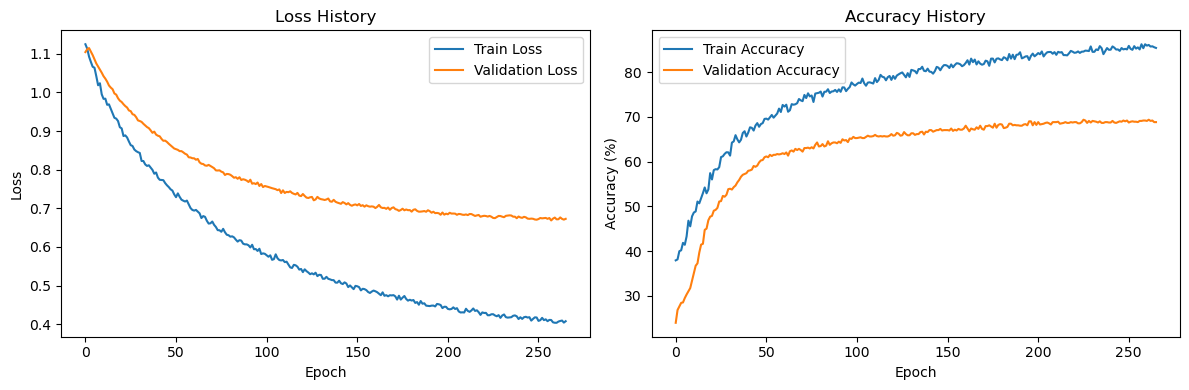

0
Early stopping at epoch 320


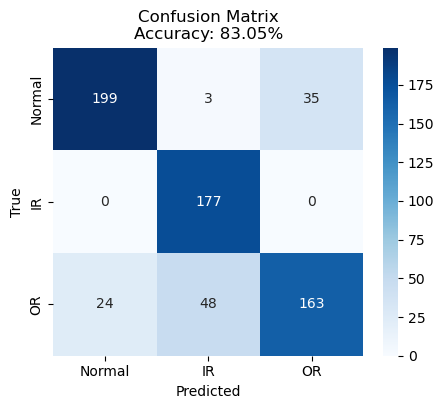

 - Model accuracy: 83.05%


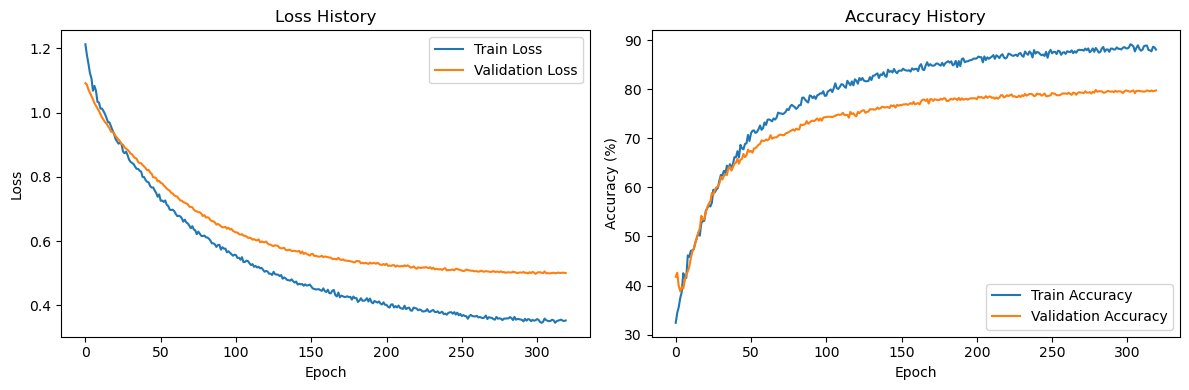

0
Early stopping at epoch 329


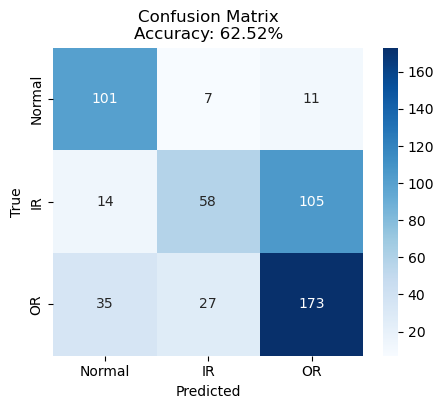

 - Model accuracy: 62.52%


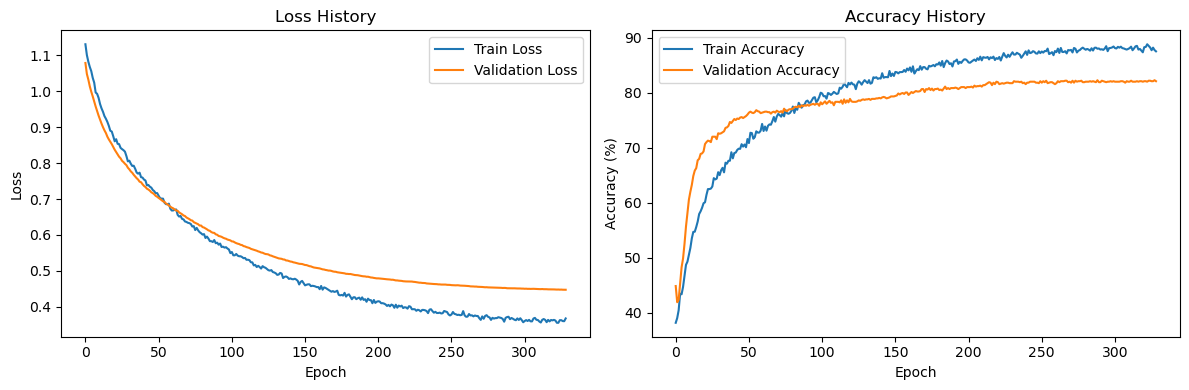

0
Early stopping at epoch 384


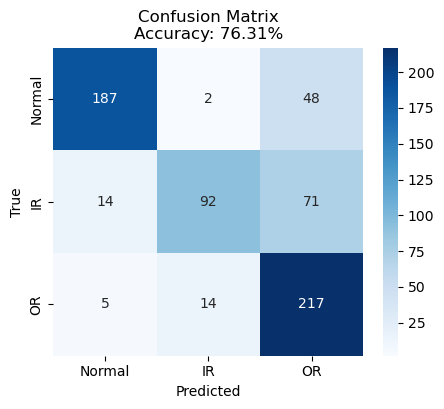

 - Model accuracy: 76.31%


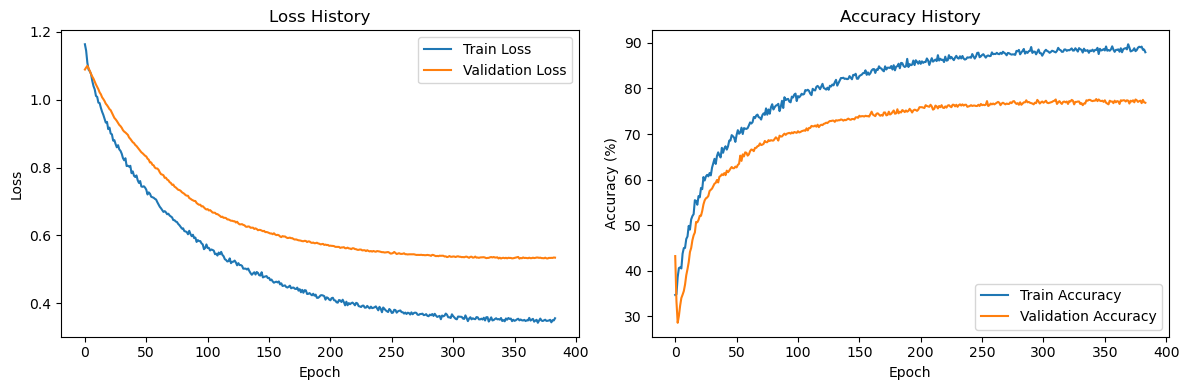

0
Early stopping at epoch 368


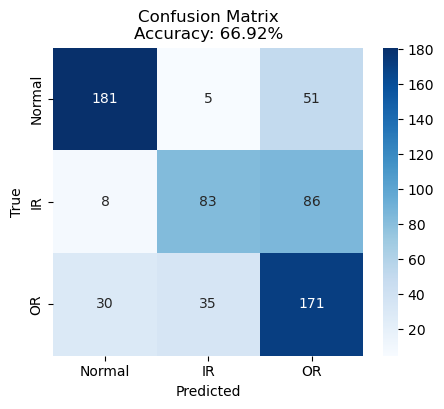

 - Model accuracy: 66.92%


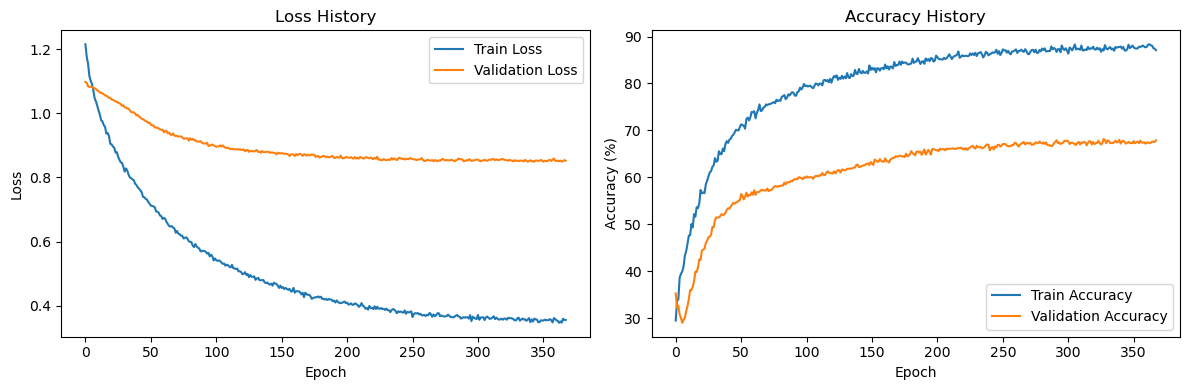

0
Early stopping at epoch 312


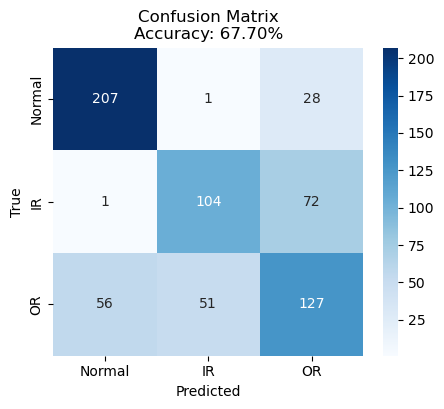

 - Model accuracy: 67.70%


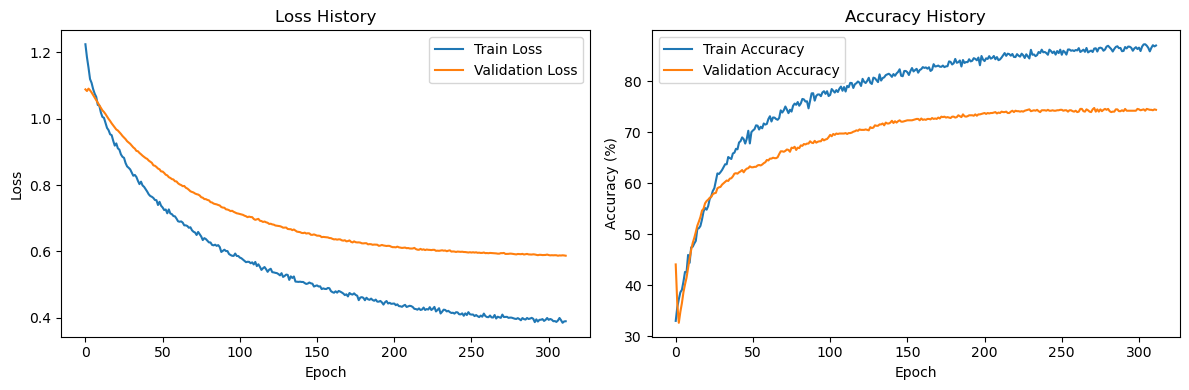

0
Early stopping at epoch 312


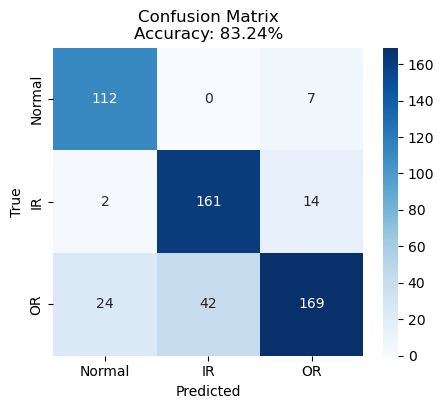

 - Model accuracy: 83.24%


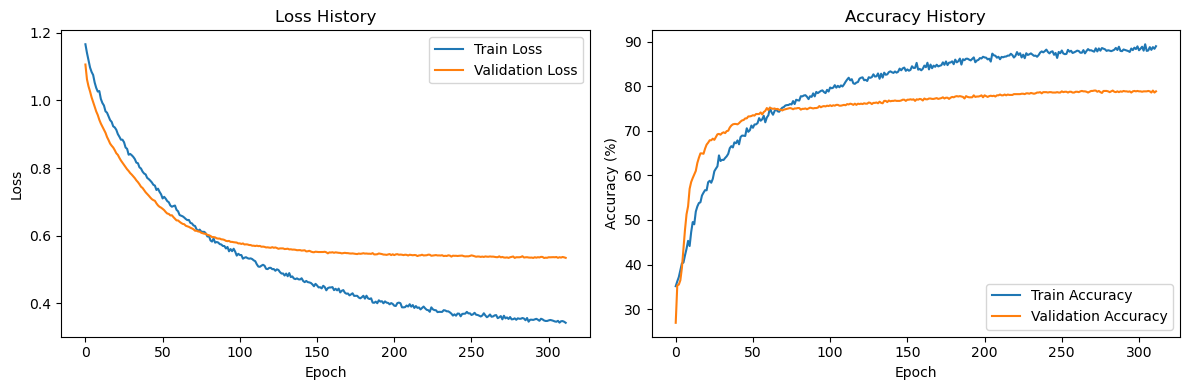

0
Early stopping at epoch 393


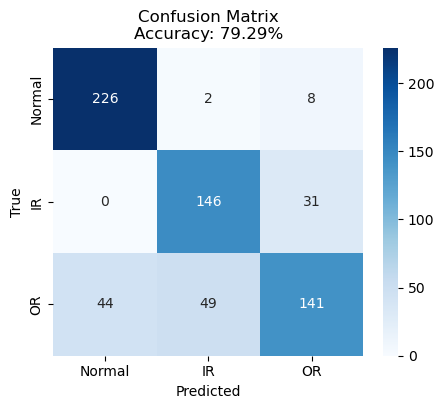

 - Model accuracy: 79.29%


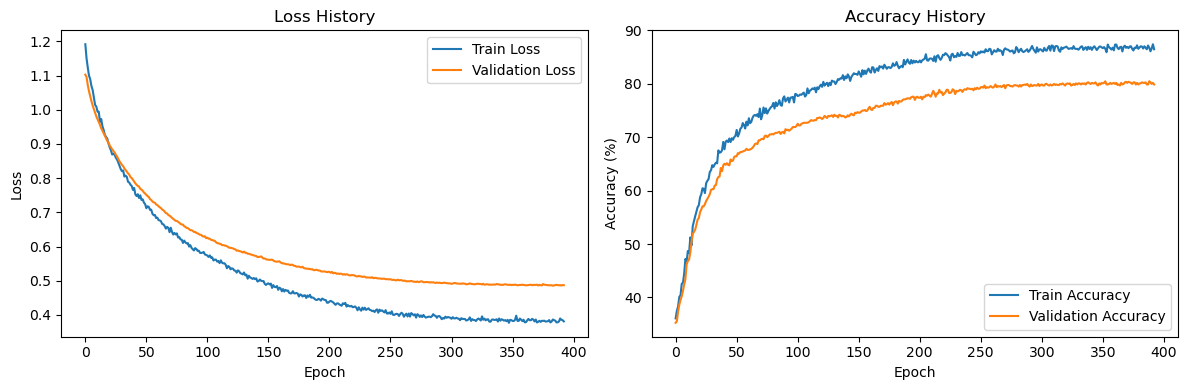

0
Early stopping at epoch 393


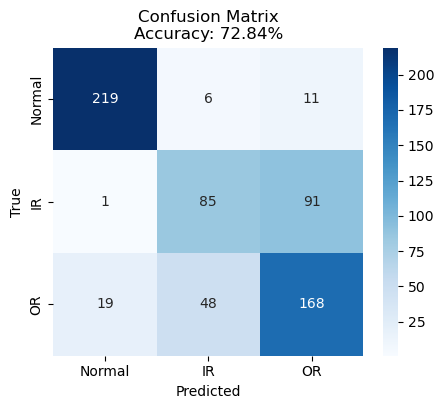

 - Model accuracy: 72.84%


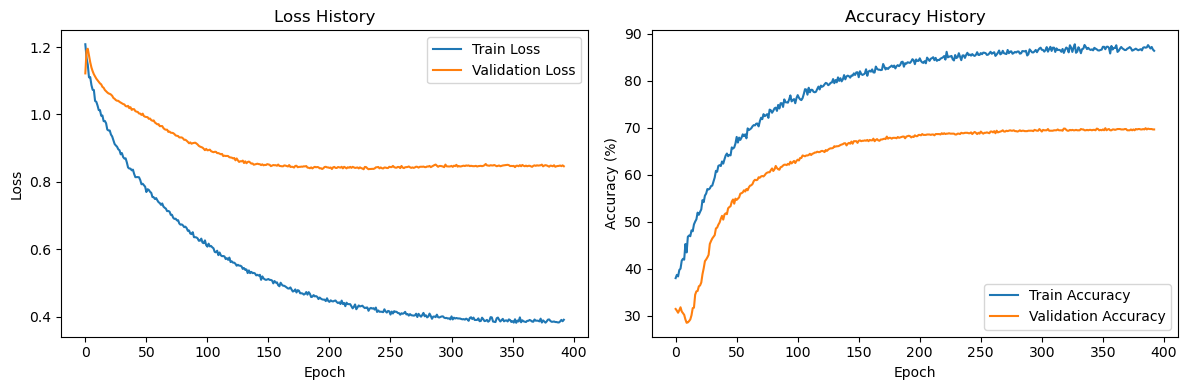

0
Early stopping at epoch 317


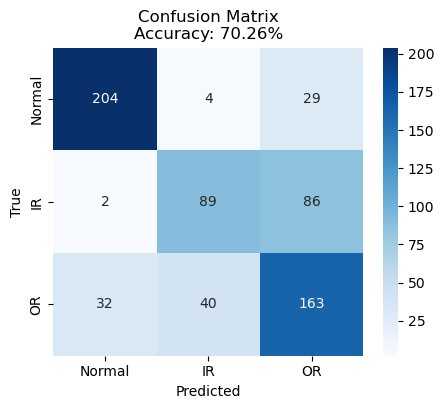

 - Model accuracy: 70.26%


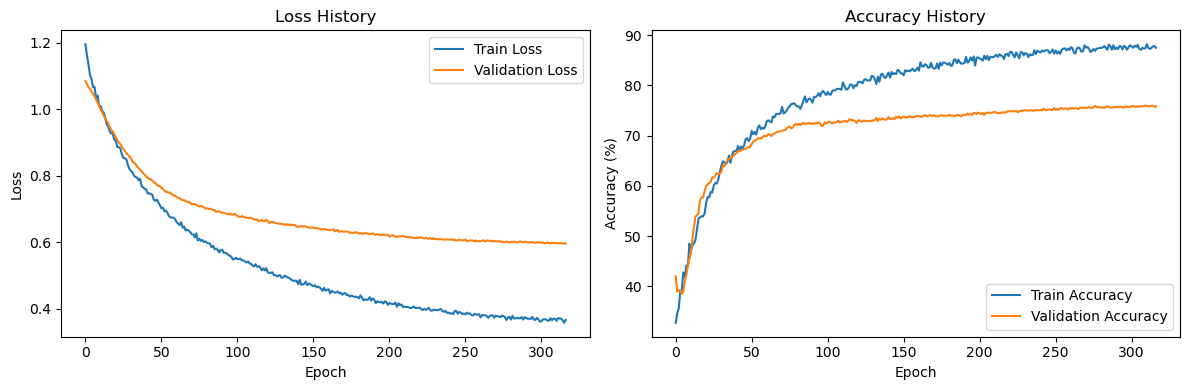

0
Early stopping at epoch 342


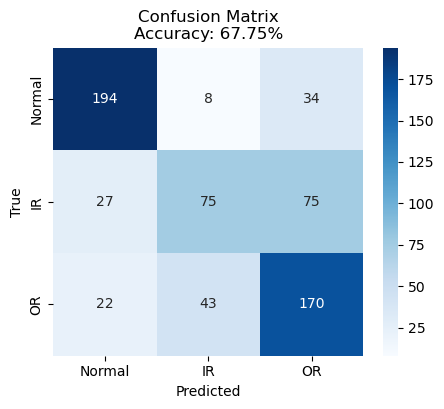

 - Model accuracy: 67.75%


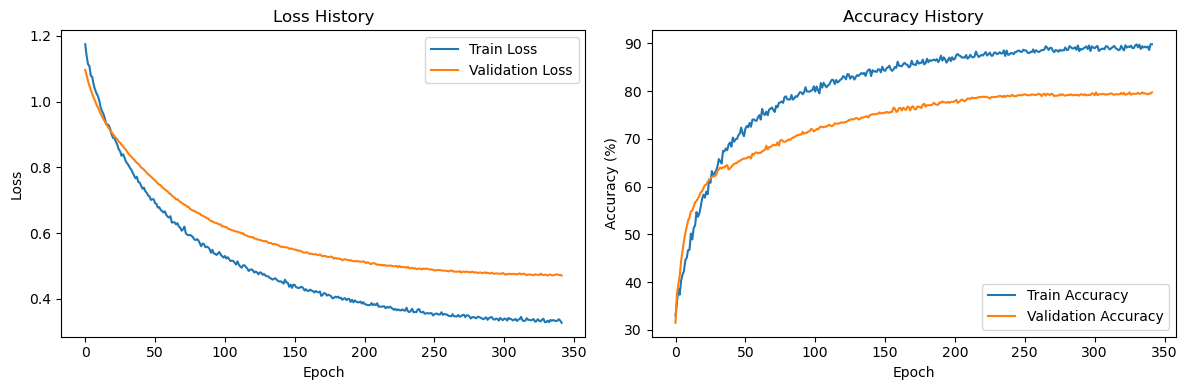

0
Early stopping at epoch 276


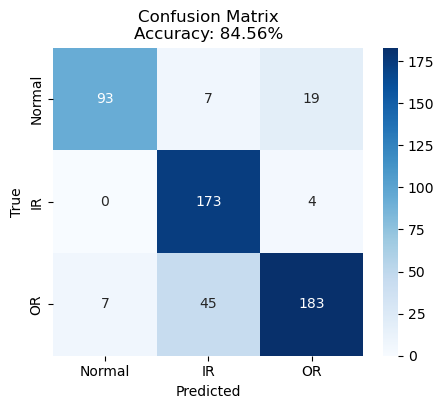

 - Model accuracy: 84.56%


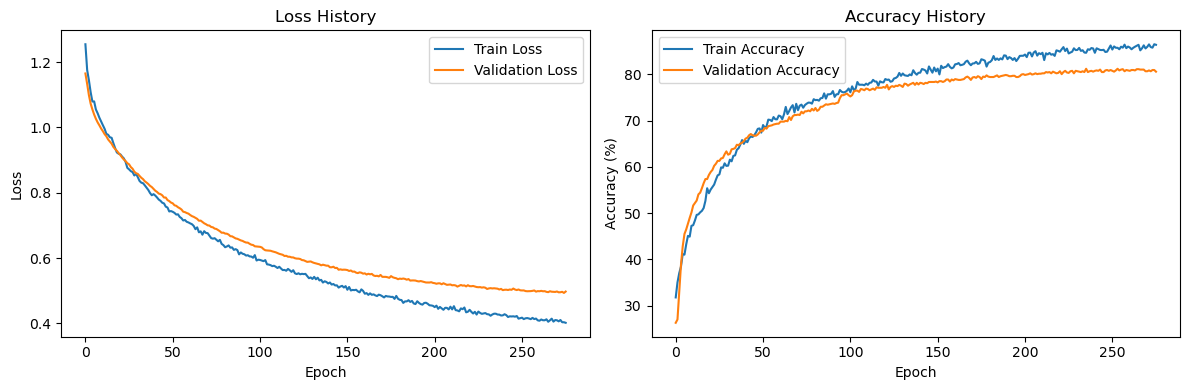

0
Early stopping at epoch 373


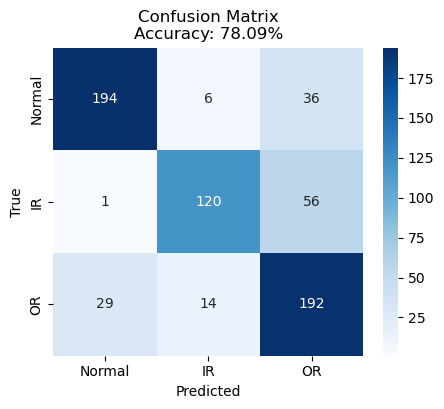

 - Model accuracy: 78.09%


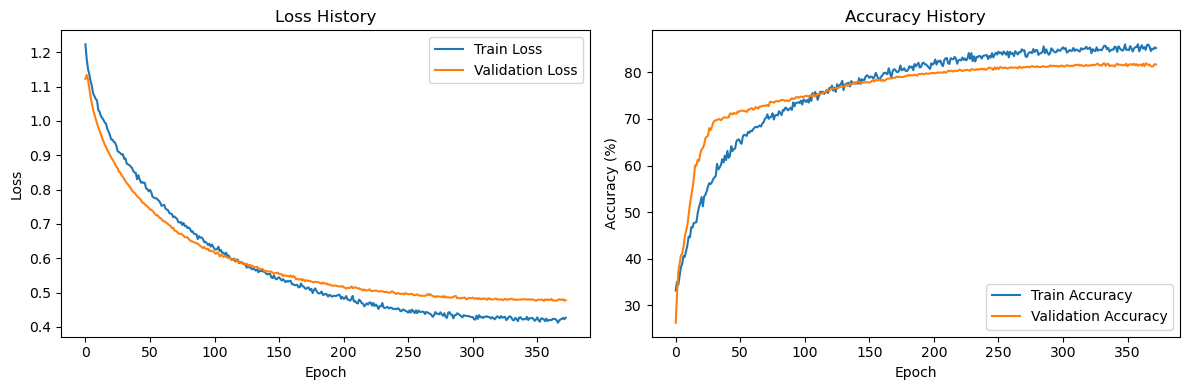

0


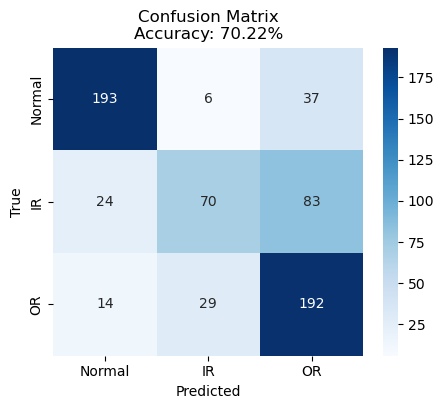

 - Model accuracy: 70.22%


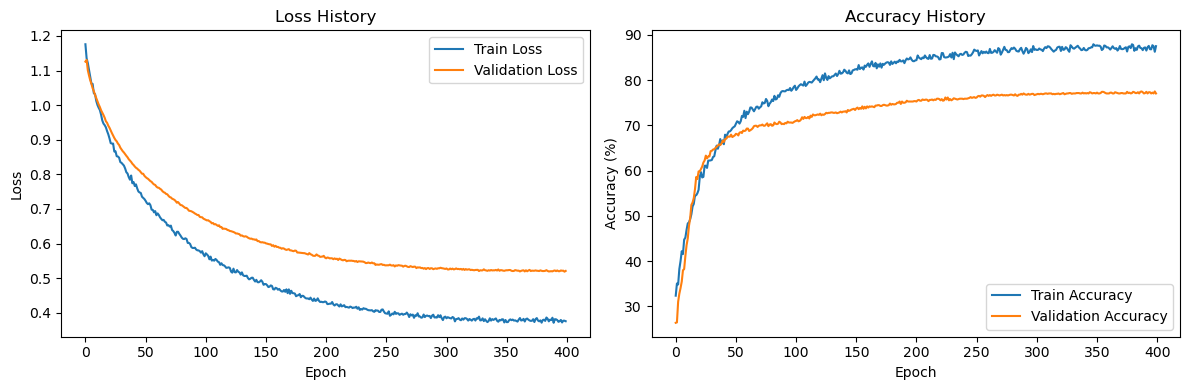

0
Early stopping at epoch 358


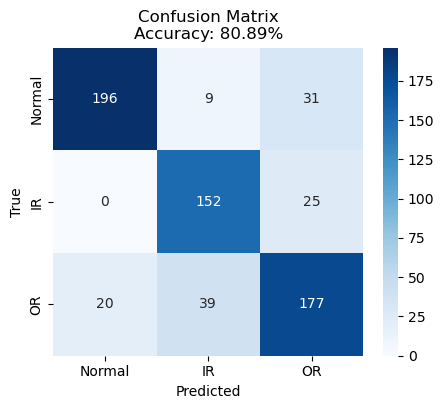

 - Model accuracy: 80.89%


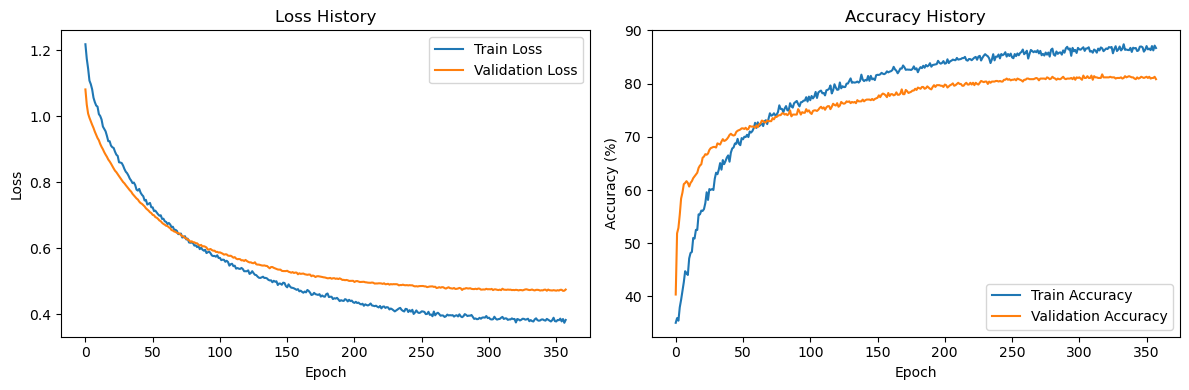

0
Early stopping at epoch 301


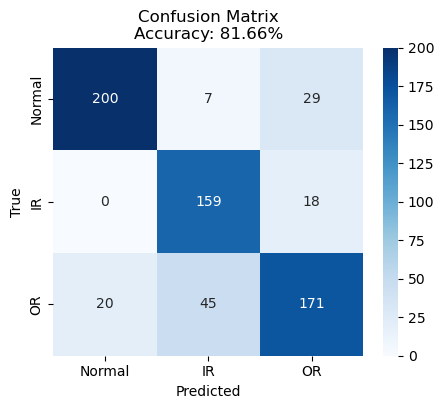

 - Model accuracy: 81.66%


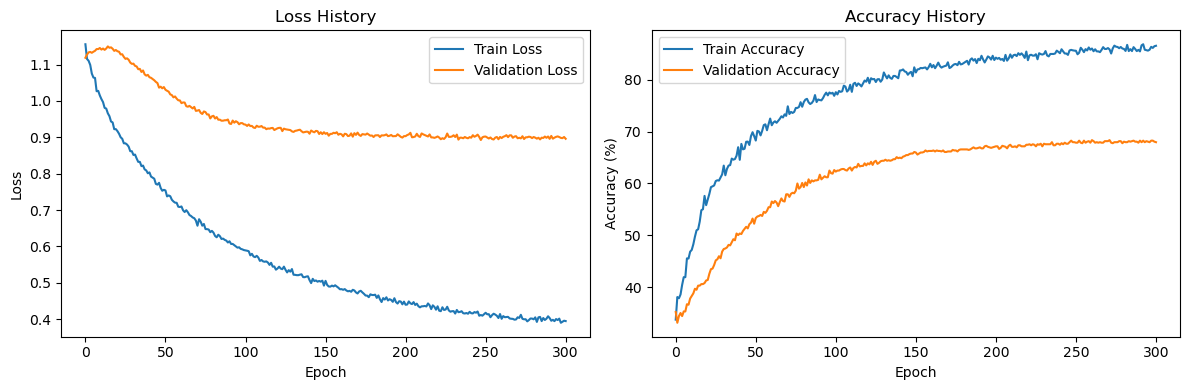

0
Early stopping at epoch 285


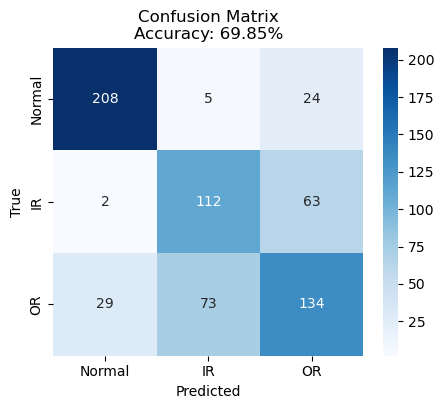

 - Model accuracy: 69.85%


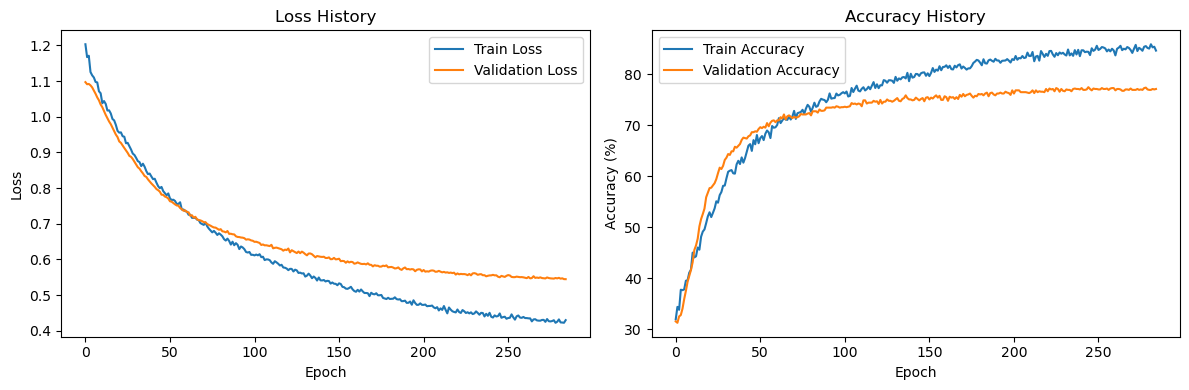

0
Early stopping at epoch 324


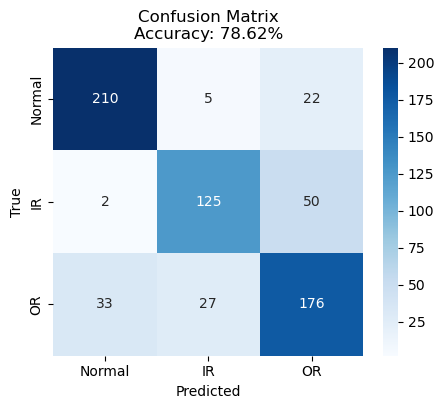

 - Model accuracy: 78.62%


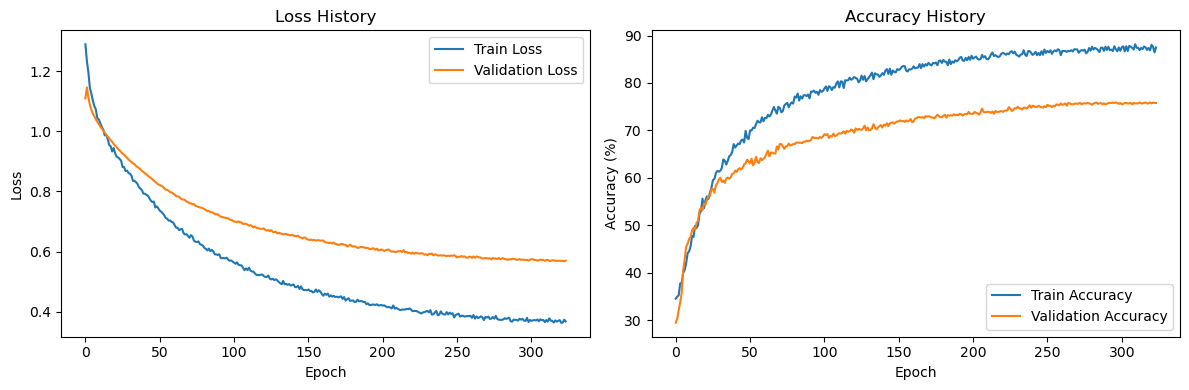

0
Early stopping at epoch 351


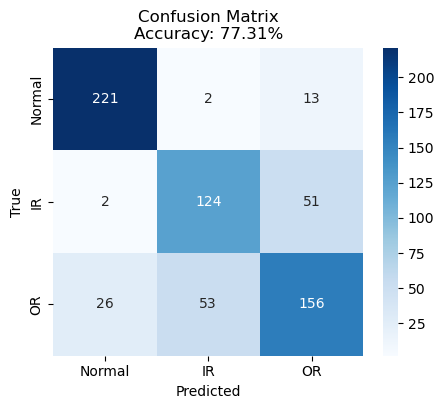

 - Model accuracy: 77.31%


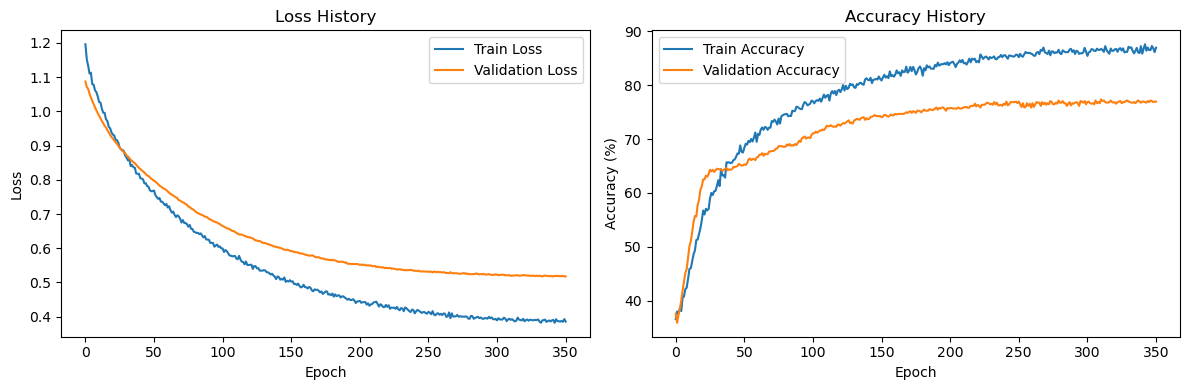

0
Early stopping at epoch 368


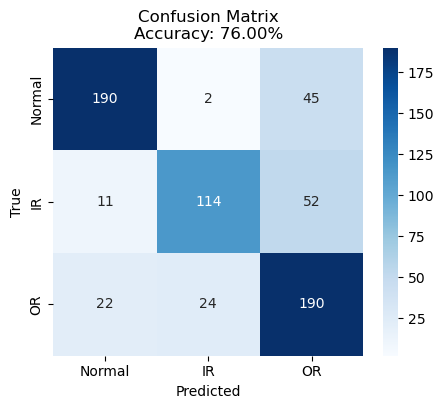

 - Model accuracy: 76.00%


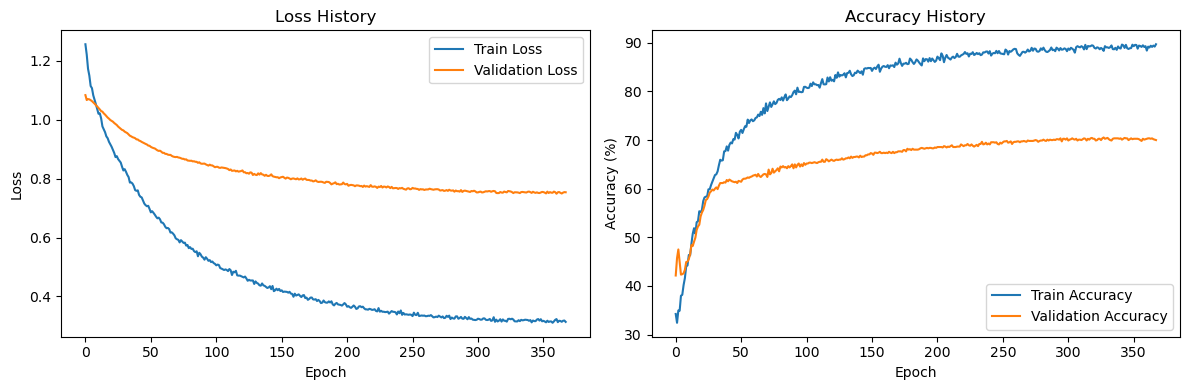

0
Early stopping at epoch 336


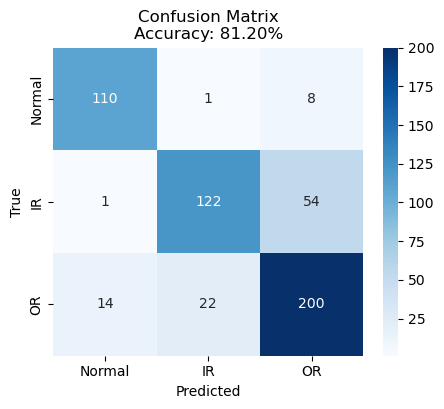

 - Model accuracy: 81.20%


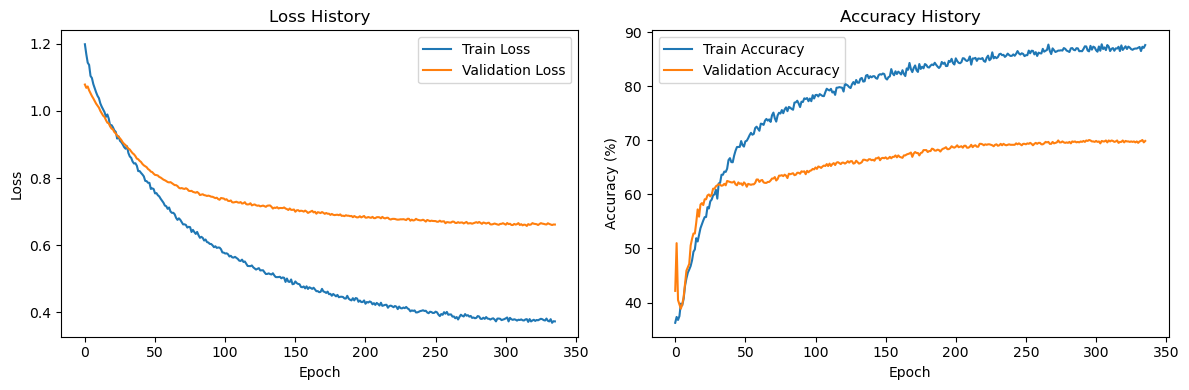

0
Early stopping at epoch 379


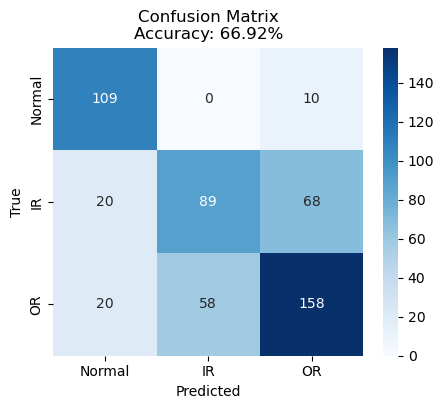

 - Model accuracy: 66.92%


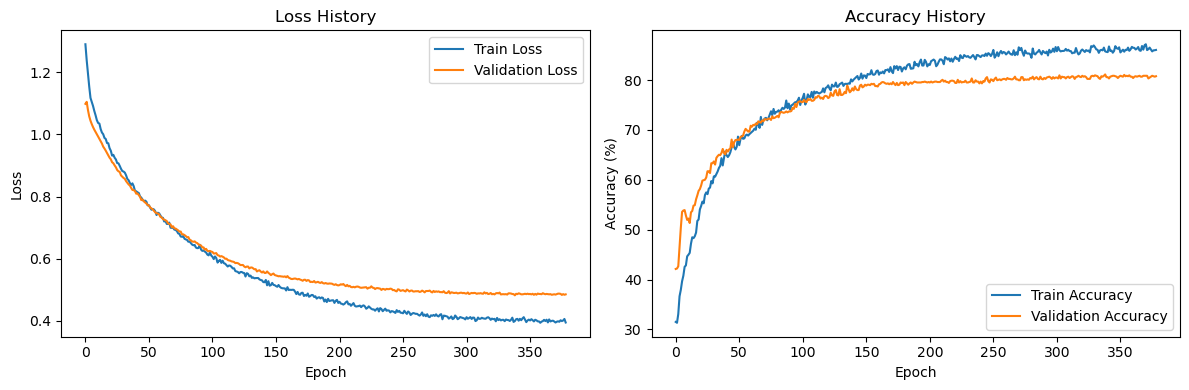

Mean accuracy: 0.7519346820773366
Std accuracy: 0.06950692118576308


In [1]:
import cfg
from src import data_loader as data_loader, models, trainer, evaluate, preprocessing
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
import numpy as np

accuracy_list = []

for i in range(30):
    trainer.set_seed(i)

    X_train, Y_train, X_val, Y_val, X_test, Y_test, test_files, len_processed = data_loader.data_import(cfg, 500)

    scaler = preprocessing.DataScaler(method='min_max', feature_range=(0, 1))
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    train_loader, val_loader, test_loader = data_loader.create_dataloaders(X_train, Y_train, X_val, Y_val,X_test, Y_test, cfg, len_processed)

    model = models.Deeper1DCNN(1, cfg.NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr= cfg.LEARNING_RATE) #weight_decay=1e-4
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max= cfg.NUM_EPOCHS, eta_min=cfg.LEARNING_RATE *1e-2)

    trained_model, history = trainer.train_model(model, train_loader, val_loader, criterion, optimizer, 'test.pth', scheduler, num_epochs=cfg.NUM_EPOCHS, device=cfg.DEVICE)

    accuracy = evaluate.plot_confusion_matrix(trained_model, test_loader, 'cpu', cfg.CLASS_NAMES)
    accuracy_list.append(accuracy)
    evaluate.plot_history(history)

print('='*20)
print('Mean accuracy:', np.mean(accuracy_list))
print('Std accuracy:', np.std(accuracy_list))